In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
# Declare a Base using automap_base
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [48]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [49]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [50]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

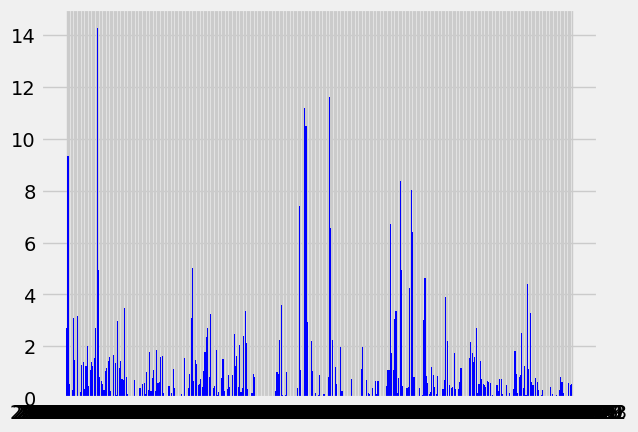

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_scores=session.query(Measurement.date,func.sum(Measurement.prcp)).\
group_by(Measurement.date).filter(Measurement.date>=year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df=pd.DataFrame(precip_scores,columns=["Measurement Date", "Precipitation Amount"])
#precip_df.head()

# Sort the dataframe by date
precip_df.sort_values(by="Measurement Date")

# Use Pandas Plotting with Matplotlib to plot the data
x_axis=precip_df["Measurement Date"]
y_axis=precip_df["Precipitation Amount"]
#plt.xlabel("Date")
#plt.ylabel("Inches")
#tick_locations = [value+dt.timedelta(days=90) for value in x_axis]
#plt.xticks(tick_locations, precip_df["Measurement Date"], rotation="vertical")
plt.tight_layout()
plt.grid(which='major', axis='both', linestyle='-')
plt.bar(x_axis,y_axis,color="b",alpha=1)
plt.show()


In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation Amount
count,366.000000
mean,0.978907
std,1.776349
min,0.000000
25%,0.052500
50%,0.405000
75%,1.087500
max,14.280000


# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(Station.id).count()
total_stations

9

In [66]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_precip=session.query(Measurement.station,func.count(Measurement.id)).\
                             group_by(Measurement.station).\
                             order_by(func.count(Measurement.id).desc()).all()
station_precip



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

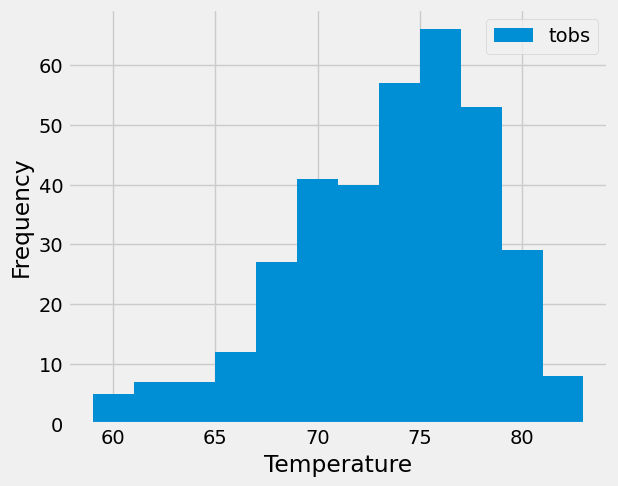

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()